In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import bokeh.plotting as bkp
import altair as alt
from plotnine import ggplot

#sklearnpackadges for ML
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import bokeh.plotting as bkp
import altair as alt
from plotnine import ggplot

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-frenzy/sample_submission.csv
/kaggle/input/forest-frenzy/train.csv
/kaggle/input/forest-frenzy/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/forest-frenzy/train.csv")
test = pd.read_csv("/kaggle/input/forest-frenzy/test.csv")
submission = pd.read_csv("/kaggle/input/forest-frenzy/sample_submission.csv")

In [4]:
train.shape, test.shape

((200000, 56), (200000, 55))

In [5]:
print(train.head(10))

    id  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0   A1       2840      20      6                                42   
1   A2       2690      95     11                                 0   
2   A3       2759      22     17                                 0   
3   A4       3140      51     27                               400   
4   A5       3170      29      6                                30   
5   A6       2780     148     16                                60   
6   A7       2871     134     24                               175   
7   A8       2964      26     13                               153   
8   A9       2743     240      9                                60   
9  A10       3201      35     11                               256   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               6                              566   
1                               0                             1605   
2                  

In [6]:
print(train.tail(10))

             id  elevation  aspect  slope  horizontal_distance_to_hydrology  \
199990  A199991       3275     180     10                               474   
199991  A199992       2840      29     12                               201   
199992  A199993       2784      43     18                               361   
199993  A199994       3269     351     15                                42   
199994  A199995       2748     140     17                                 0   
199995  A199996       2703     150      8                               256   
199996  A199997       2797      69     12                               402   
199997  A199998       2940     249     19                               255   
199998  A199999       2919     103      9                               234   
199999  A200000       2726     294     17                               210   

        vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
199990                              68                 

In [7]:
summary = train.describe()
print(summary)

           elevation         aspect          slope  \
count  200000.000000  200000.000000  200000.000000   
mean     2958.791210     155.399210      14.111920   
std       280.551377     111.894283       7.495462   
min      1859.000000       0.000000       0.000000   
25%      2808.000000      58.000000       9.000000   
50%      2995.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       horizontal_distance_to_hydrology  vertical_distance_to_hydrology  \
count                     200000.000000                   200000.000000   
mean                         269.629200                       46.518375   
std                          212.560778                       58.397441   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [8]:
train.isnull().sum(),test.isnull().sum()

(id                                    0
 elevation                             0
 aspect                                0
 slope                                 0
 horizontal_distance_to_hydrology      0
 vertical_distance_to_hydrology        0
 horizontal_distance_to_roadways       0
 hillshade_9am                         0
 hillshade_noon                        0
 hillshade_3pm                         0
 horizontal_distance_to_fire_points    0
 wilderness_area1                      0
 wilderness_area2                      0
 wilderness_area3                      0
 wilderness_area4                      0
 soil_type1                            0
 soil_type2                            0
 soil_type3                            0
 soil_type4                            0
 soil_type5                            0
 soil_type6                            0
 soil_type7                            0
 soil_type8                            0
 soil_type9                            0
 soil_type10    

In [13]:
# selecting soil columns
soil_columns = train.columns[train.columns.str.startswith('soil_type')]

# Merge columns into a single column based on occurrence of 1
train['merged_soil'] = train[soil_columns].apply(lambda row: ','.join(row.index[row == 1]), axis=1)

# Drop the original soil columns
train.drop(columns=soil_columns, inplace=True)

print(train)

             id  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0            A1       2840      20      6                                42   
1            A2       2690      95     11                                 0   
2            A3       2759      22     17                                 0   
3            A4       3140      51     27                               400   
4            A5       3170      29      6                                30   
...         ...        ...     ...    ...                               ...   
199995  A199996       2703     150      8                               256   
199996  A199997       2797      69     12                               402   
199997  A199998       2940     249     19                               255   
199998  A199999       2919     103      9                               234   
199999  A200000       2726     294     17                               210   

        vertical_distance_to_hydrology  horizontal_

In [9]:
train.head()

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
0,A1,2840,20,6,42,6,566,216,228,149,...,0,0,0,0,0,0,0,0,0,2
1,A2,2690,95,11,0,0,1605,238,223,114,...,0,0,0,0,0,0,0,0,0,2
2,A3,2759,22,17,0,0,752,207,200,126,...,0,0,0,0,0,0,0,0,0,1
3,A4,3140,51,27,400,219,1981,222,172,68,...,0,1,0,0,0,0,0,0,0,1
4,A5,3170,29,6,30,1,1288,218,226,144,...,0,0,0,0,0,0,0,0,0,2


In [10]:
# selecting soil columns
wilderness_columns = train.columns[train.columns.str.startswith('wilderness_area')]

# Merge columns into a single column based on occurrence of 1
train['merged_wilderness'] = train[wilderness_columns].apply(lambda row: ','.join(row.index[row == 1]), axis=1)

# Drop the original soil columns
train.drop(columns=wilderness_columns, inplace=True)

print(train)

             id  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0            A1       2840      20      6                                42   
1            A2       2690      95     11                                 0   
2            A3       2759      22     17                                 0   
3            A4       3140      51     27                               400   
4            A5       3170      29      6                                30   
...         ...        ...     ...    ...                               ...   
199995  A199996       2703     150      8                               256   
199996  A199997       2797      69     12                               402   
199997  A199998       2940     249     19                               255   
199998  A199999       2919     103      9                               234   
199999  A200000       2726     294     17                               210   

        vertical_distance_to_hydrology  horizontal_

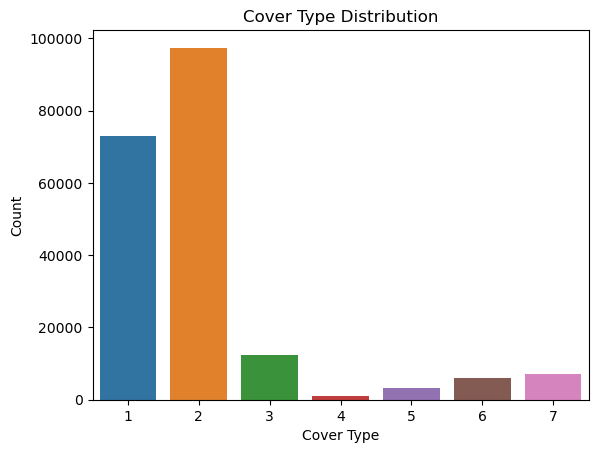

In [11]:
#looking at cover type
sns.countplot(x='cover_type', data=train)
plt.xlabel('Cover Type')  
plt.ylabel('Count')  
plt.title('Cover Type Distribution')

plt.show()

In [10]:
print(train)

             id  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0            A1       2840      20      6                                42   
1            A2       2690      95     11                                 0   
2            A3       2759      22     17                                 0   
3            A4       3140      51     27                               400   
4            A5       3170      29      6                                30   
...         ...        ...     ...    ...                               ...   
199995  A199996       2703     150      8                               256   
199996  A199997       2797      69     12                               402   
199997  A199998       2940     249     19                               255   
199998  A199999       2919     103      9                               234   
199999  A200000       2726     294     17                               210   

        vertical_distance_to_hydrology  horizontal_

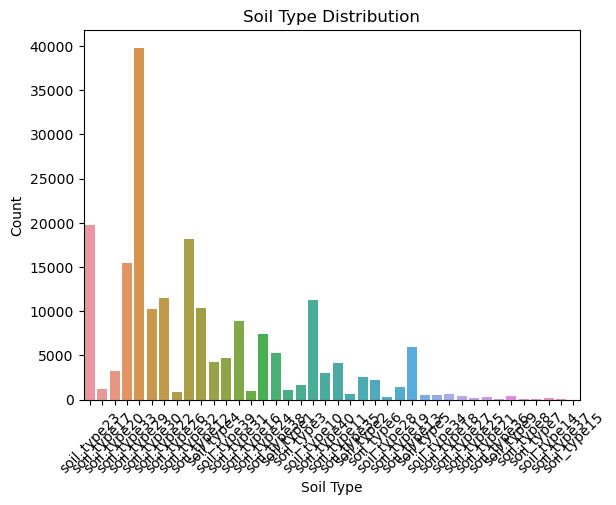

In [14]:
sns.countplot(x='merged_soil', data=train)
plt.xlabel('Soil Type')  
plt.ylabel('Count')  
plt.title('Soil Type Distribution')
plt.xticks(rotation=45

plt.show()

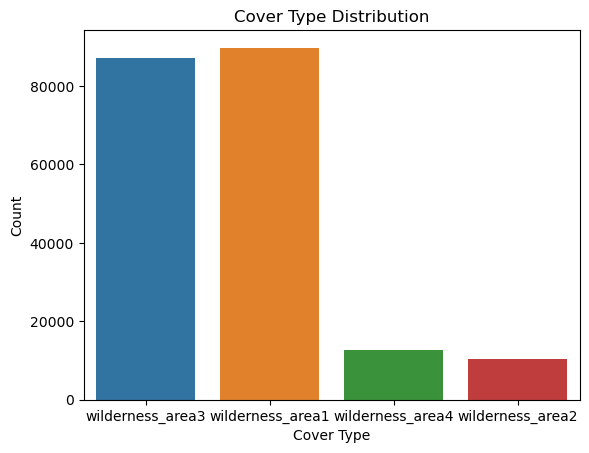

In [13]:
sns.countplot(x='merged_wilderness', data=train)
plt.xlabel('Wilderness Type')  
plt.ylabel('Count')  
plt.title('Wilderness Type Distribution')

plt.show()

In [ ]:
# Create correlation matrix
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, annot_kws={"fontsize":8}, cmap=sns.diverging_palette(220, 20, as_cmap=True))